In [9]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

standard = pandas.read_csv("results/log_0_ResNet18_standard_1.0.csv")
weighted_05 = pandas.read_csv("results/log_0_ResNet18_weighted_0.5.csv")
weighted_025 = pandas.read_csv("results/log_0_ResNet18_weighted_0.25.csv")
weighted_0125 = pandas.read_csv("results/log_0_ResNet18_weighted_0.125.csv")
weighted_1 = pandas.read_csv("results/log_0_ResNet18_weighted_1.csv")
weighted_2 = pandas.read_csv("results/log_0_ResNet18_weighted_2.csv")
weighted_4 = pandas.read_csv("results/log_0_ResNet18_weighted_4.csv")
weighted_8 = pandas.read_csv("results/log_0_ResNet18_weighted_8.csv")
erm_neg2 = pandas.read_csv("results/log_decay1e-2_ResNet18_erm_1.0.csv")
erm_neg3 = pandas.read_csv("results/log_decay1e-3_ResNet18_erm_1.0.csv")
erm_neg4 = pandas.read_csv("results/log_decay1e-4_ResNet18_erm_1.0.csv")
mu0 = pandas.read_csv("results/log_mu0_ResNet18_weighted_1.csv")
mu05 = pandas.read_csv("results/log_mu05_ResNet18_weighted_1.csv")

standard["experiment"] = "standard"
weighted_05["experiment"] = "weighted 0.5"
weighted_025["experiment"] = "weighted 0.25"
weighted_0125["experiment"] = "weighted 0.125"
weighted_1["experiment"] = "weighted 1"
weighted_2["experiment"] = "weighted 2"
weighted_4["experiment"] = "weighted 4"
weighted_8["experiment"] = "weighted 8"
erm_neg2["experiment"] = "erm decay 1e-2"
erm_neg3["experiment"] = "erm decay 1e-3"
erm_neg4["experiment"] = "erm decay 1e-4"
mu0["experiment"] = "mu 0"
mu05["experiment"] = "mu 0.5"

df = pandas.concat(
    [
        standard,
        weighted_05,
        weighted_025,
        weighted_0125,
        weighted_1,
        weighted_2,
        weighted_4,
        weighted_8,
        erm_neg2,
        erm_neg3,
        erm_neg4,
        mu0,
        mu05,
    ]
)
df["train acc"] = df["train acc"] / 100
df["test acc"] = df["test acc"] / 100

In [10]:
print("Best test accuracy")
print(df.groupby("experiment")["test acc"].max().sort_values(ascending=False))

Best test accuracy
experiment
weighted 0.125    0.9441
mu 0              0.9440
mu 0.5            0.9432
weighted 1        0.9429
weighted 0.5      0.9428
standard          0.9417
weighted 0.25     0.9411
weighted 2        0.9397
weighted 4        0.9327
weighted 8        0.9168
erm decay 1e-4    0.4885
erm decay 1e-3    0.4790
erm decay 1e-2    0.2878
Name: test acc, dtype: float64


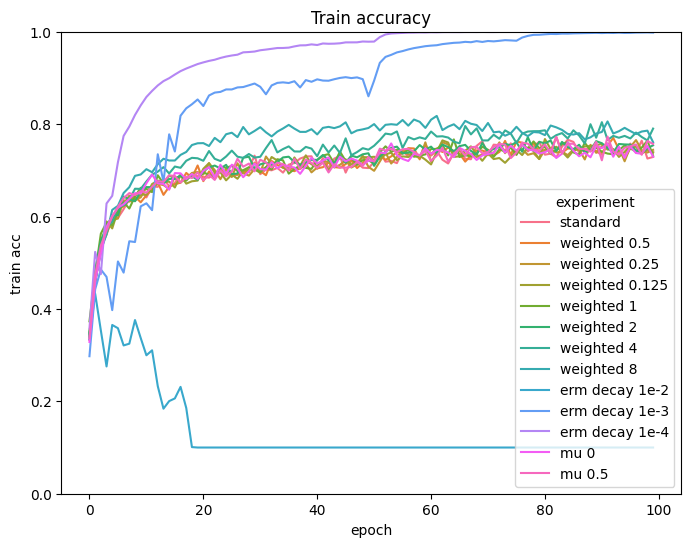

In [11]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Train accuracy")
plt.show()

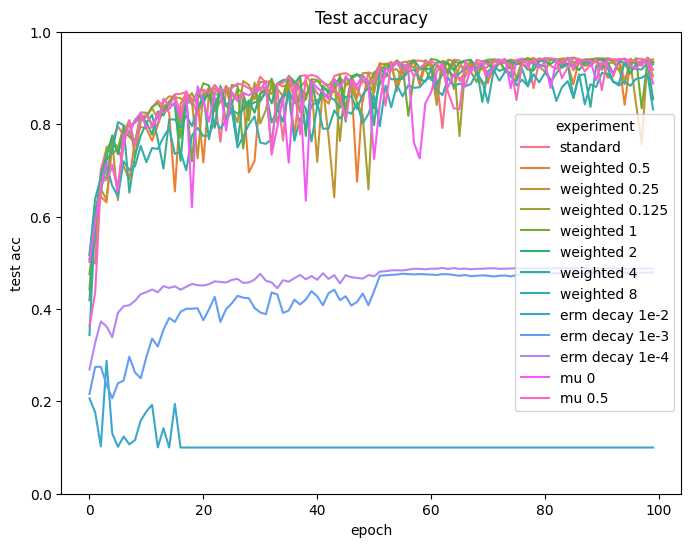

In [13]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Test accuracy")
plt.show()

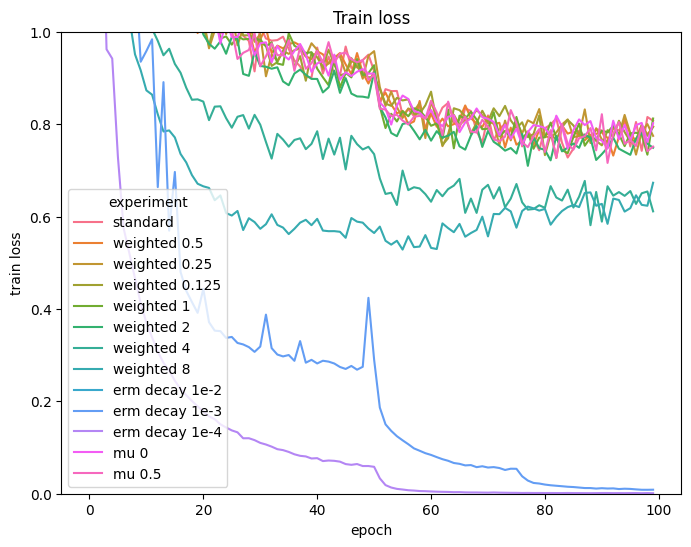

In [14]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Train loss")
plt.show()

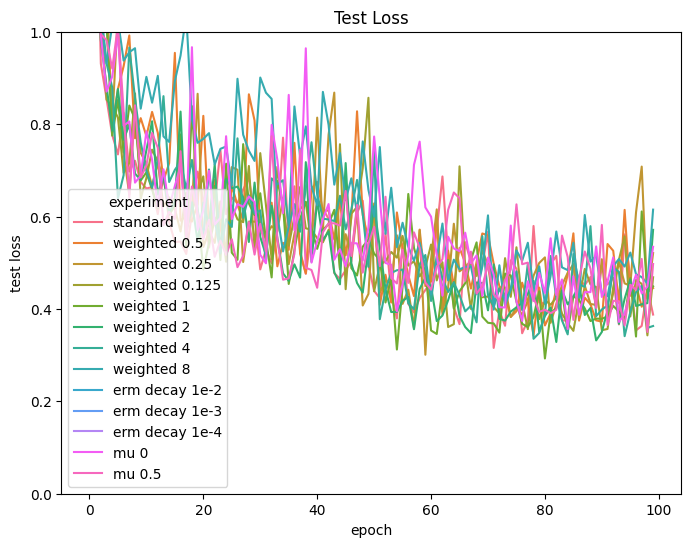

In [15]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Test Loss")
plt.show()

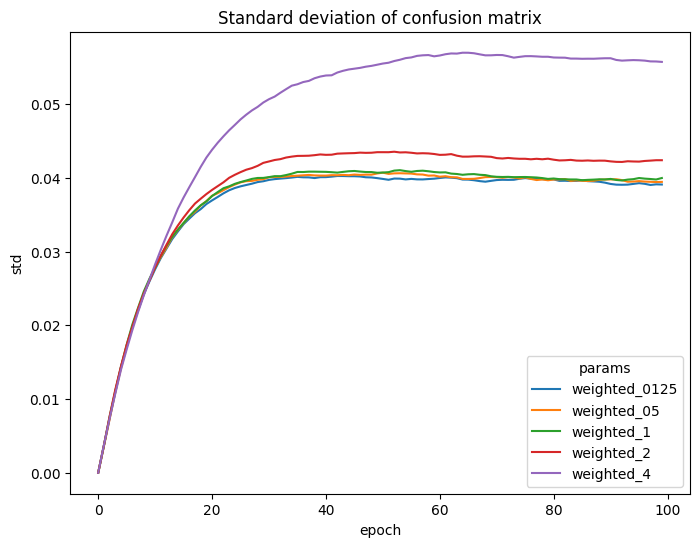

In [ ]:
cms_weighted_0125 = torch.load("results/cm_0_ResNet18_weighted_0.125.pt")
cms_weighted_025 = torch.load("results/cm_0_ResNet18_weighted_0.25.pt")
cms_weighted_05 = torch.load("results/cm_0_ResNet18_weighted_0.5.pt")
cms_weighted_1 = torch.load("results/cm_0_ResNet18_weighted_1.pt")
cms_weighted_2 = torch.load("results/cm_0_ResNet18_weighted_2.pt")
cms_weighted_4 = torch.load("results/cm_0_ResNet18_weighted_4.pt")
# cms_weighted_8 = torch.load("results/cm_0_ResNet18_weighted_8.pt")

cms_weighted_0125 = cms_weighted_0125.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_025 = cms_weighted_025.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_05 = cms_weighted_05.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_1 = cms_weighted_1.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_2 = cms_weighted_2.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_4 = cms_weighted_4.permute(2, 0, 1).reshape(100, -1).std(dim=1)
# cms_weighted_8 = cms_weighted_8.permute(2, 0, 1).reshape(100, -1).std(dim=1)

df_cms_weighted_0125 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_0125, "params": "weighted_0125"}
)
df_cms_weighted_05 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_05, "params": "weighted_05"}
)
df_cms_weighted_1 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_1, "params": "weighted_1"}
)
df_cms_weighted_2 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_2, "params": "weighted_2"}
)
df_cms_weighted_4 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_4, "params": "weighted_4"}
)
# df_cms_weighted_8 = pandas.DataFrame(
#     {"epoch": np.arange(100), "std": cms_weighted_8, "params": "weighted_8"}
# )

df_cms = pandas.concat(
    [
        df_cms_weighted_0125,
        df_cms_weighted_05,
        df_cms_weighted_1,
        df_cms_weighted_2,
        df_cms_weighted_4,
        # df_cms_weighted_8,
    ]
)

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_cms, x="epoch", y="std", hue="params")
plt.title("Standard deviation of confusion matrix")
plt.show()